# Probabilistic Machine Learning {-}
#### Machine Learning in Science, University of Tübingen, Summer Semester 2022

# EXAMple
## a {-}
For any two events $A, B \in \Omega$
\begin{align*}
    P(A\mid B) &= \frac{P(A,B)}{P(B)} \\\\
    P(A,B) \geq 0; P(B) \geq 0 &\implies \frac{P(A,B)}{P(B)} \geq 0 \tag{1} \\\\
    P(\Omega \mid B) &= \frac{P(\Omega,B)}{P(B)} \\
    &= \frac{1\cdot P(B)}{P(B)}\tag{2} \\
    &= 1 \\\\
\end{align*}
Let $A_1, A_2, A_3, \dots \in \Omega$ be disjoint:
\begin{align*}
    P(A_1, A_2, A_3, \dots\mid B) &= \frac{ P(A_1, A_2, A_3, \dots)}{P(B)} \\
    &= \frac{ P(A_1)+P( A_2)+P( A_3) + \dots}{P(B)} \tag{3}\\
    &= \frac{ P(A_1)}{P(B)}+\frac{P( A_2)}{P(B)}+\frac{P( A_3)}{P(B)} + \dots \\
    &= P(A_1\mid B) + P(A_2\mid B) + P(A_3\mid B) + \dots
\end{align*}

## b {-}
### i {-}
Yes!  
$P(H_1, H_2 \mid B) = P(H_1 \mid B) \cdot P(H_2 \mid B) = 0.01 \cdot 0.01$

### ii {-}
No!  
$P(H_1, H_2) \neq P(H_1) \cdot P(H_2)$

## c {-}
Let $W_i$ be the event of winning in the $i$th \"round\"

### i {-}
$$P(W_1) = \frac{2}{3}$$

### ii {-}
$$P(W_2 \mid W_1) = \frac{1}{2} $$

### iii {-}
$$P(W_2 \mid \lnot W_1) = 1 $$

### iv {-}
\begin{align*}
P(W_2) &= P(W_1)\cdot P(W_2 \mid W_1) + P(\lnot W_1)\cdot P(W_2 \mid \lnot W_1) \\
&= \frac{2}{3} \cdot \frac{1}{2} + \frac{1}{3} \cdot 1 \\
&= \frac{2}{3} 
= P(W_1)
\end{align*}
It doesnt have any impact on my winning chances

### v {-}

\begin{align*}
    P(W_1 \mid W_2) &= \frac{P(W_2 \mid W_1)P(W_1)}{P(W_2)} \\
    &= \frac{\frac{1}{2}\cdot\frac{2}{3}}{\frac{2}{3}} \\
    &= \frac{1}{2}
\end{align*}

# Theory

$$ P(A) = \frac{|A|}{p} $$
$$ P(A, B) = \frac{|A\cap B|}{p}$$
Assume $A$ and $B$ are independent, then
\begin{align*}
    P(A,B) &= P(A) \cdot P(B) \\
    &= \frac{|A|}{p} \cdot \frac{|B|}{p}\\
\end{align*}  

\begin{align*}
    \implies \frac{|A|}{p} \cdot \frac{|B|}{p} &= \frac{|A\cap B|}{p} \\
    |A\cap B| \cdot p &= |A| \cdot |B|
\end{align*}

Because $p$ is a prime, this can only be true when:  
1. $|A\cap B| = 0 \implies |A|=0 \text{ or } |B|=0 \implies A=\emptyset \text{ or } B=\emptyset$  
2. $|A|=p \text{ or } |B|=p \implies A=\Omega \text{ or } B=\Omega$

# Practical Question
## Exercise 01 {-}

**hand in before 29.04.2022, 12:00 p.m. (noon)**

---

In the lecture, we calculated the probability of someone having COVID given a positive COVID test. In this exercise, we ask you to code up a method that performs this calculation, given the sensitivity and specificity of a COVID test, depending on the prevalence of COVID.

### 1) COVID Prevalence {-}
The 7 Day Incidence Rate per 100,000 people in Germany (as of 19.04.2022) is 698.9. How would you convert this number into the probability of someone having COVID in Germany? (Hint: Ignore the length of time for which people remain sick, and simply assume that the incidence rate represents the total number of people with COVID per 100,000 people on a given day)


In [1]:
inc = 698.9

prevalence = inc / 1e5
prevalence

0.0069889999999999996

### 2) Sensitivity and Specificity {-}
Several ``Schnell-tests'' are available on the market for COVID self-testing. Their diagnosic accuracy is measured by their sensitivity and specificity. 
1. How are the sensitivity and specificity of a test defined?
2. How would you compute the probabilities of a false positive test and a false negative test, given its sensitivity and specificity?

**Answer 2)**
1. 
sensitivity is the probability of a true positive: $P(\text{'test: covid'} \mid \text{'covid'})$  
specificity is the probability of a true negative: $P(\text{'test: no covid'} \mid \text{'no covid'})$

2.  
false pos:
$P(\text{'test: covid'} \mid \text{'no covid'}) = 1 - P(\text{'test: no covid'} \mid \text{'no covid'}) = 1 - \text{specificity}$  
false neg:
$P(\text{'test: no covid'} \mid \text{' covid'}) = 1 - P(\text{'test: covid'} \mid \text{'covid'}) = 1 - \text{sensitivity}$

### 3) Probability of Infection {-}


1. Which probabilities would you need to compute the probability of an infection given a positive test?
2. Which mathematical theorem would you use to compute this quantity?


**Answer 3)**
1. 
 - Probability of infection (without test)
 - Sensitivity
 - Specificity

2.  
Bayes' Theorem

### 4) Function definition {-}

Write a function that returns the probability of having COVID given a positive test. The function should take as inputs the sensitivity and specificity of a test, and the COVID prevalence.

In [2]:
# Your code here
def covid_prob(sens, spec, prev = 698.9 / 1e5):
    p_positive = sens * prev + (1-spec) * (1-prev)
    return sens * prev * 1/p_positive

    

### 5) Test your code {-}
Using the function you wrote above, compute the probability of having COVID, given a positive COVID test with sensitivity = 0.9652 and specificity = 0.9968 for prevalence:
1. 0.016319 (Korea, South)
2. 0.006989 (Germany)
3. 0.000613 (Norway)

(Prevalence based on https://oscovida.github.io/countries-incidence-rate.html, date of access: 19.04.22)

In [3]:
sens = 0.9652
spec = 0.9968

countries = ['South Korea', 'Germany', 'Norway']
prevs = [0.016319, 0.006989, 0.000613]

for country, prev in zip(countries, prevs):
    print(f'In {country} the Probability of having covid after a positive test is {round(covid_prob(sens, spec, prev)*100, 2)}%')

In South Korea the Probability of having covid after a positive test is 83.34%
In Germany the Probability of having covid after a positive test is 67.98%
In Norway the Probability of having covid after a positive test is 15.61%


### 6) Plot of infection probability {-}

Plot how the probability of infection given a positive COVID test changes, depending on COVID prevalence.  

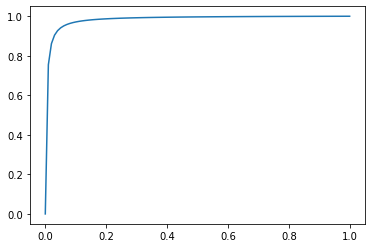

In [4]:
import numpy as np
from matplotlib import pyplot as plt
prev_space = np.linspace(0,1, 100)
p_infection = covid_prob(sens, spec, prev_space)

plt.plot(prev_space, p_infection)
plt.show()